# **`Let's Grow More - Internship`**

# **<u>`Task: Music Recommendation System`<u>**

**Importing required libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

**Reading the each dataframe**

In [2]:
members_df = pd.read_csv(r'members.csv')
song_extra_info_df = pd.read_csv(r"song_extra_info.csv")
songs_df = pd.read_csv(r"songs.csv")
train_df = pd.read_csv(r"train.csv")
test_df = pd.read_csv(r"test.csv")

In [3]:
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [4]:
song_extra_info_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [5]:
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [6]:
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [7]:
test_df.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


## **Data Preprocessing**

**Need to create target variable in test dataset and assign three to it as value so later on I can extract the same test from merged dataset**

In [8]:
test_df['target'] = 3

**Merging the dataframes into one single dataframe**

In [9]:
new = pd.concat([train_df,test_df],axis=0)

In [10]:
new = pd.merge(new,members_df,on = 'msno',how='left')

In [11]:
new = pd.merge(new,songs_df,on='song_id',how='left')

In [12]:
final_df = pd.merge(new,song_extra_info_df,on='song_id',how='left')

**Merged dataframe:**

In [13]:
final_df.sample(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,id,city,bd,gender,...,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
8643035,FG+WikEK8x1GZIB4E2keTq2SJX4bXjFjG5gkjc8qbcw=,e3ZbdyX1A4ZdTiIwE6LJe5Ig5js3JloeBE8ozhfYgKg=,my library,Local playlist more,local-library,3,1265617.0,12,27,female,...,20130118,20170907,188453.0,465,Selena Gomez,Antonina Armato| Tim James| Adam Schmalholz,NaN,52.0,Love You Like A Love Song,USHR11132668
4371975,le00ECAkJW1Dr+fnExmA5AoQs5XyTgVUYufn7MtMJiw=,un97bVjGL490RQbl8kr/58qbzkeuFBGMnXFRst9RArs=,discover,Online playlist more,online-playlist,0,NaN,13,19,female,...,20151107,20171201,259082.0,465,Ed Sheeran,Ed Sheeran| Johnny McDaid| Martin Harrington| ...,NaN,52.0,Photograph,GBAHS1400094
1750125,k3tVRuV7aRHyNFfxj5aqFHfBRDd1cQ8WVzM7U29pt+c=,gE/2ao2b9l5VAKKgd2R8ijy5Uk6YwkXjYGQipFW2WN4=,my library,Local playlist more,local-library,1,NaN,1,0,NaN,...,20150302,20170930,288298.0,465,Scorpions,NaN,NaN,52.0,Still Loving You,USIR20200220
5260995,r7ZovGl8HNJ8SeBB0a0wVkhT/aHD6WeTmqsG8At0qRo=,nXcp2+JiYHi1w9XZqZqyY/EEll/uleB66RctsZrn4pY=,my library,NaN,top-hits-for-artist,1,NaN,12,21,NaN,...,20151007,20171023,203755.0,359,Against the Current,NaN,NaN,52.0,Demons,USAT21600690
1084210,hYJpPvGod6vy09TnlXdQe3Q0vlxju5u5Ruf8V2XkTio=,+lOK5frPwB20ovBepDi2Jq9Q64hh1C1mR653w9RcmBg=,search,Online playlist more,online-playlist,0,NaN,1,59,male,...,20160926,20170929,242520.0,465,aMEI (張惠妹),張雨生,張雨生,3.0,Are You Ready,TWB519805201


**Rows and columns of newly created dataframe**

In [14]:
print(f"Rows:{final_df.shape[0]}")
print(f"Columns:{final_df.shape[1]}")

Rows:9934208
Columns:21


**Data types of each column**

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9934208 entries, 0 to 9934207
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   id                      float64
 7   city                    int64  
 8   bd                      int64  
 9   gender                  object 
 10  registered_via          int64  
 11  registration_init_time  int64  
 12  expiration_date         int64  
 13  song_length             float64
 14  genre_ids               object 
 15  artist_name             object 
 16  composer                object 
 17  lyricist                object 
 18  language                float64
 19  name                    object 
 20  isrc                    object 
dtypes: float64(3), int64(6), object

**Checking the null values present in the each variable**

In [16]:
final_df.isnull().sum()

msno                            0
song_id                         0
source_system_tab           33291
source_screen_name         577687
source_type                 28836
target                          0
id                        7377418
city                            0
bd                              0
gender                    4013703
registered_via                  0
registration_init_time          0
expiration_date                 0
song_length                   139
genre_ids                  160565
artist_name                   139
composer                  2295010
lyricist                  4403542
language                      192
name                         2235
isrc                       774501
dtype: int64

**Dropping the duplicated values if exist**

In [17]:
final_df = final_df.drop_duplicates()

**There's language column which actual has null values as well as categorical but the datatype of that column is float64, so we need to explicitly take care of it.**

In [18]:
final_df['language'] = final_df['language'].astype('object')

**Checking the each categorical variable, if there's null values in categorical column, it'll be replaced by the 'unknown' as categorical value**


In [19]:
for i in final_df.select_dtypes(include=['object']).columns:
  final_df[i][final_df[i].isnull()] = 'unknown'

**Descriptive statistics of the entire dataframe**

In [20]:
final_df.describe()

,target,id,city,bd,registered_via,registration_init_time,expiration_date,song_length
count,9.934208e+06,2.556790e+06,9.934208e+06,9.934208e+06,9.934208e+06,9.934208e+06,9.934208e+06,9.934069e+06
mean,1.146043e+00,1.278394e+06,7.488166e+00,1.750373e+01,6.792155e+00,2.012841e+07,2.017162e+07,2.447922e+05
std,1.173398e+00,7.380818e+05,6.648934e+00,2.172704e+01,2.273409e+00,3.039067e+04,3.794595e+03,6.894272e+04
min,0.000000e+00,0.000000e+00,1.000000e+00,-4.300000e+01,3.000000e+00,2.004033e+07,1.970010e+07,1.393000e+03
25%,0.000000e+00,6.391972e+05,1.000000e+00,0.000000e+00,4.000000e+00,2.011071e+07,2.017091e+07,2.144130e+05
50%,1.000000e+00,1.278394e+06,5.000000e+00,2.100000e+01,7.000000e+00,2.013103e+07,2.017093e+07,2.409600e+05
75%,3.000000e+00,1.917592e+06,1.300000e+01,2.900000e+01,9.000000e+00,2.015103e+07,2.017101e+07,2.715680e+05
max,3.000000e+00,2.556789e+06,2.200000e+01,1.051000e+03,1.600000e+01,2.017023e+07,2.020102e+07,1.085171e+07


**Correlation among all the numerical varibles present in the dataframe**

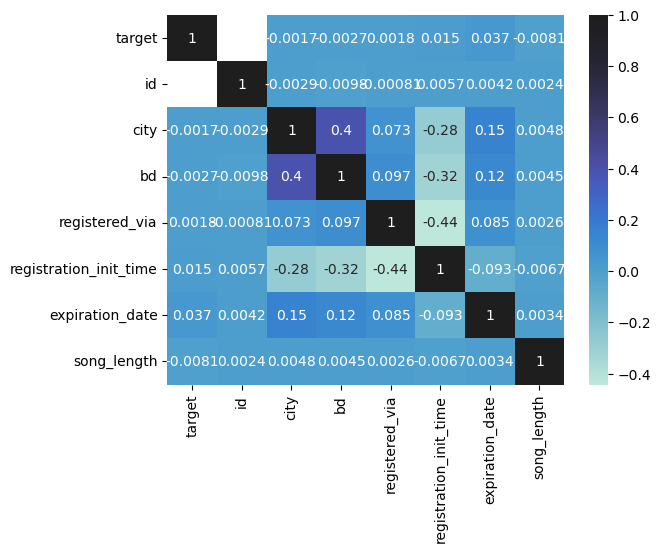

In [21]:
sns.heatmap(final_df.corr(),annot=True,center=1)
plt.show()

### **Feature engineering and extracion**


**There are two date columns which represents the registratin and expiration. So we can convert it into single column by taking difference between two.**

In [22]:
final_df['registration_init_time'] = pd.to_datetime(final_df['registration_init_time'],format='%Y%m%d')
final_df['expiration_date'] = pd.to_datetime(final_df['expiration_date'],format='%Y%m%d') 
final_df['duration'] = final_df['expiration_date'] - final_df['registration_init_time'] 


In [23]:
final_df['duration'] = final_df['duration'].apply(lambda x:x.days)

#### Converting the 'isrc' alnum column to only alpha 

In [24]:
def extract_alpha_(s):
    alpha_chars = ''
    for char in s:
        if char.isalpha():
            alpha_chars += char
        else:
          continue
    return alpha_chars

In [25]:
final_df['isrc'] = final_df['isrc'].apply(lambda x:extract_alpha_(x))

#### Extracting the valuable information from 'lyricist' and  'composer' columns

In [26]:
import re

In [27]:
def make(pattern,str):
  a = re.split(pattern,str)
  a = a[0].strip()
  return a 

In [28]:
final_df['lyricist'] = final_df['lyricist'].apply(lambda x:make(r'/|;',x))

In [29]:
final_df['composer'] = final_df['composer'].apply(lambda x:make(r'/|;',x))

#### Stripping the white space from 'artist_name' column

In [30]:
final_df['artist_name'] = final_df['artist_name'].apply(lambda x:x.strip())

**Dropping the unnecessary columns**

In [31]:
final_df.drop(columns=['id','name','song_length','registration_init_time','expiration_date','city','bd','registered_via'],inplace=True)

#### Converting column object data type into category data type

In [32]:
for col in final_df.select_dtypes(include=['object']).columns:
    final_df[col] = final_df[col].astype('category')

#### Encoding categorical features

In [33]:
for col in final_df.select_dtypes(include=['category']).columns:
    final_df[col] = final_df[col].cat.codes

#### Making sure that there's no null value in Dataframe

In [35]:
final_df.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
gender                0
genre_ids             0
artist_name           0
composer              0
lyricist              0
language              0
isrc                  0
duration              0
dtype: int64

**Finalised dataset for training and testing**

In [16]:
final_df

,msno,song_id,source_system_tab,source_screen_name,source_type,target,gender,genre_ids,artist_name,composer,lyricist,language,isrc,duration
0,9176,86884,1,7,6,1,2,307,3784,16220,25301,8,2072,2103
1,19273,260594,3,8,4,1,0,97,36867,72435,25301,8,4154,2301
2,19273,140755,3,8,4,1,0,97,24601,50198,25301,8,4834,2301
3,19273,27577,3,8,4,1,0,6,31651,40888,25301,0,2077,2301
4,9176,38706,1,7,6,1,2,2,5190,9418,25301,8,3001,2103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934203,19206,396079,0,11,6,3,0,127,33670,4301,1303,8,4685,2491
9934204,25753,146146,0,22,6,3,1,364,44906,75696,28307,1,607,1225
9934205,25753,409892,0,22,6,3,1,364,40898,62394,34110,1,3799,1225
9934206,25753,226660,0,22,6,3,1,371,45246,72435,25301,1,3821,1225


#### Correlation among all the variables

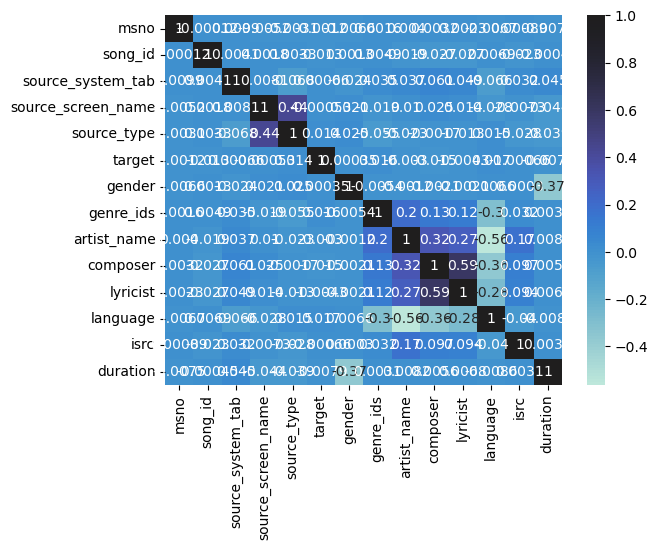

In [36]:
sns.heatmap(final_df.corr(),annot=True,center=1)
plt.show()

#### Now as preprocessing is completed, let's split our processed dataframe into the original dataframes

In [4]:
train_df = final_df[final_df['target'] != 3]

In [5]:
test_df = final_df[final_df['target'] == 3].drop('target',axis=1)

#### Defining the independent and dependent variable 

In [11]:
X = train_df.drop('target',axis=1)
y = train_df['target']

## Model Building

### `Random Forest`

#### Need to import the necessary functions of SciKit Learn

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Creating the train and test datasets

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

#### Model initialisation

In [12]:
RF = RandomForestClassifier(n_estimators=250, max_depth=25)

#### Fitting the model with train dataset

In [13]:
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=250)

#### Model's performance on train dataset

In [15]:
RF.score(X_train,y_train)

0.7689142523770288

#### Prediction using trained model

In [17]:
y_pred = RF.predict(X_test)

#### Model's performance on test dataset

In [19]:
print("accuracy score:",accuracy_score(y_test,y_pred))

accuracy score: 0.6738507499911893


### `XGBoost`

#### Need to import xgboost library explicitly

In [16]:
from xgboost import XGBClassifier

#### Model initialisation

In [9]:
XGB = XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)


#### Fitting the model with train dataset

In [14]:
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Model's performance on train dataset

In [15]:
XGB.score(X_train,y_train)

0.7857063980655923

#### Prediction using trained model

In [17]:
y_pred = XGB.predict(X_test)

#### Model's performance on test dataset

In [18]:
accuracy_score(y_test,y_pred)

0.728359778892892

#### Now let's make predictions on the assigned test_df dataframe as part of this task

In [10]:
test_df_pred = XGB.predict(test_df)

In [11]:
test_df_pred

array([1, 1, 0, ..., 0, 0, 0])